Training a CNN model which classifies the CIFAR100 dataset. dataset - https://keras.io/api/datasets/cifar100/

In [ ]:
from tensorflow.keras.datasets import cifar100
import matplotlib.pyplot as plt

2. Partition the dataset into train and test sets. Print the shapes of the train and test data sets.

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
          'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
          'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
          'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
          'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
          'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
          'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
          'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
          'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum',
          'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark',
          'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel',
          'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone',
          'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle',
          'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


3. Visualize the first 30 images from the train dataset

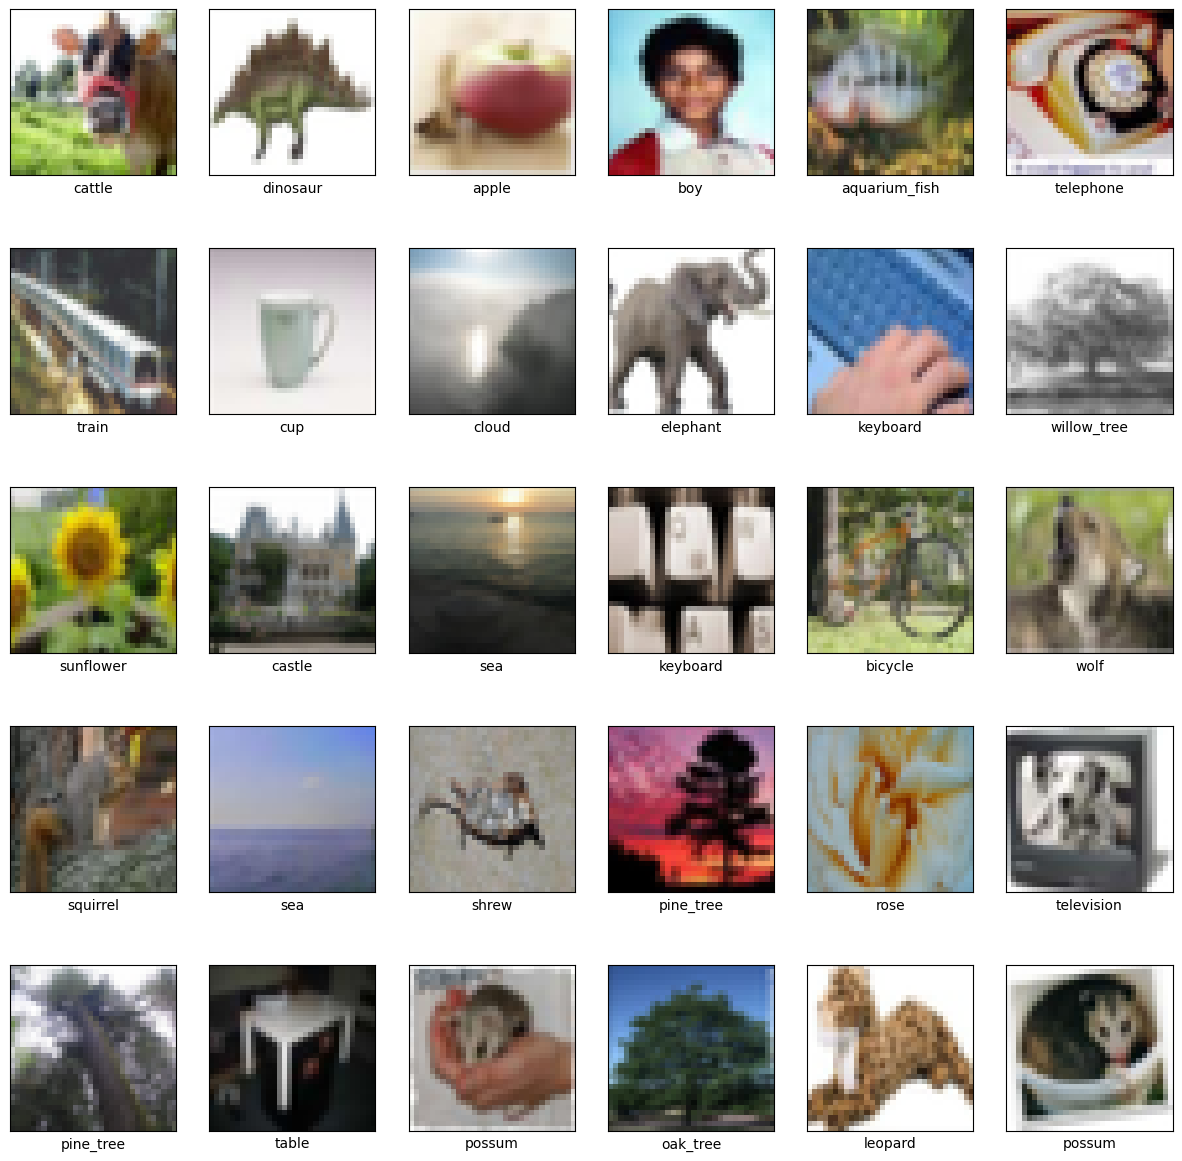

In [ ]:
plt.figure(figsize=(15, 15))

for i in range(30):
    plt.subplot(5, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    label_index = y_train[i][0] #The line label_index = y_train[i][0] extracts the first element (index 0) of
                                #the label associated with the i-th data point in the y_train array.
    plt.xlabel(f"{labels[label_index]}")

plt.show()

4. Scale the pixel values

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

5. Build a CNN sequence of layers. Must contain the following layers. Hyper parameters are up to you. a.	At least 1 convolutional layer b.	At least 1 dropout layer c.	At least 1 maxpool layer d.	At least 1 flatten layer e.	At least 1 dense layer

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 64)        0         
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 128)               1843328   
                                                                 
 dense_1 (Dense)             (None, 100)               12900     
                                                        

6. Use the loss function sparse_categorical_crossentropy when compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 7200)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               921728    
                                                                 
 dense_5 (Dense)             (None, 100)               12900     
                                                      

7. Train the model with at least 20 epochs

In [ ]:
 history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
1563/1563 [==============================] - 136s 86ms/step - loss: 3.6812 - accuracy: 0.1498 - val_loss: 3.2104 - val_accuracy: 0.2316
Epoch 2/30
1563/1563 [==============================] - 129s 82ms/step - loss: 3.0190 - accuracy: 0.2636 - val_loss: 2.9683 - val_accuracy: 0.2780
Epoch 3/30
1563/1563 [==============================] - 124s 79ms/step - loss: 2.7950 - accuracy: 0.3066 - val_loss: 2.9397 - val_accuracy: 0.2828
Epoch 4/30
1563/1563 [==============================] - 134s 86ms/step - loss: 2.6459 - accuracy: 0.3377 - val_loss: 2.7970 - val_accuracy: 0.3058
Epoch 5/30
1563/1563 [==============================] - 139s 89ms/step - loss: 2.5230 - accuracy: 0.3606 - val_loss: 2.7906 - val_accuracy: 0.3136
Epoch 6/30
1563/1563 [==============================] - 128s 82ms/step - loss: 2.4273 - accuracy: 0.3797 - val_loss: 2.7495 - val_accuracy: 0.3221
Epoch 7/30
1563/1563 [==============================] - 134s 86ms/step - loss: 2.3380 - accuracy: 0.3993 - val_loss: 2

8.	Plot the loss and accuracy curves for both train and validation sets.

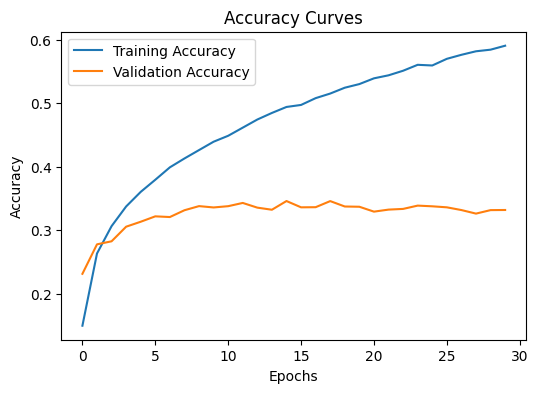

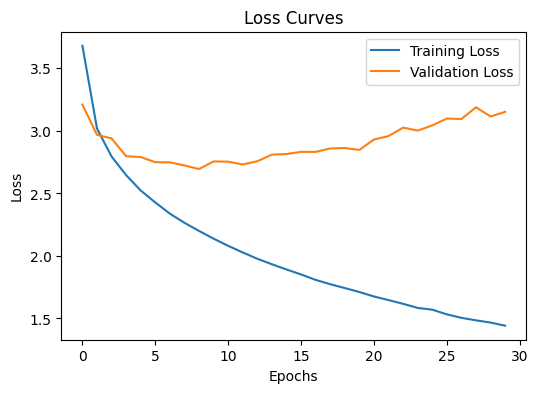

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Accuracy Curves')
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Loss Curves')
plt.legend()
plt.show()

9. Visualize the predicted and actual image labels for the first 30 images in the dataset.

1/1 [==============================] - 1s 914ms/step


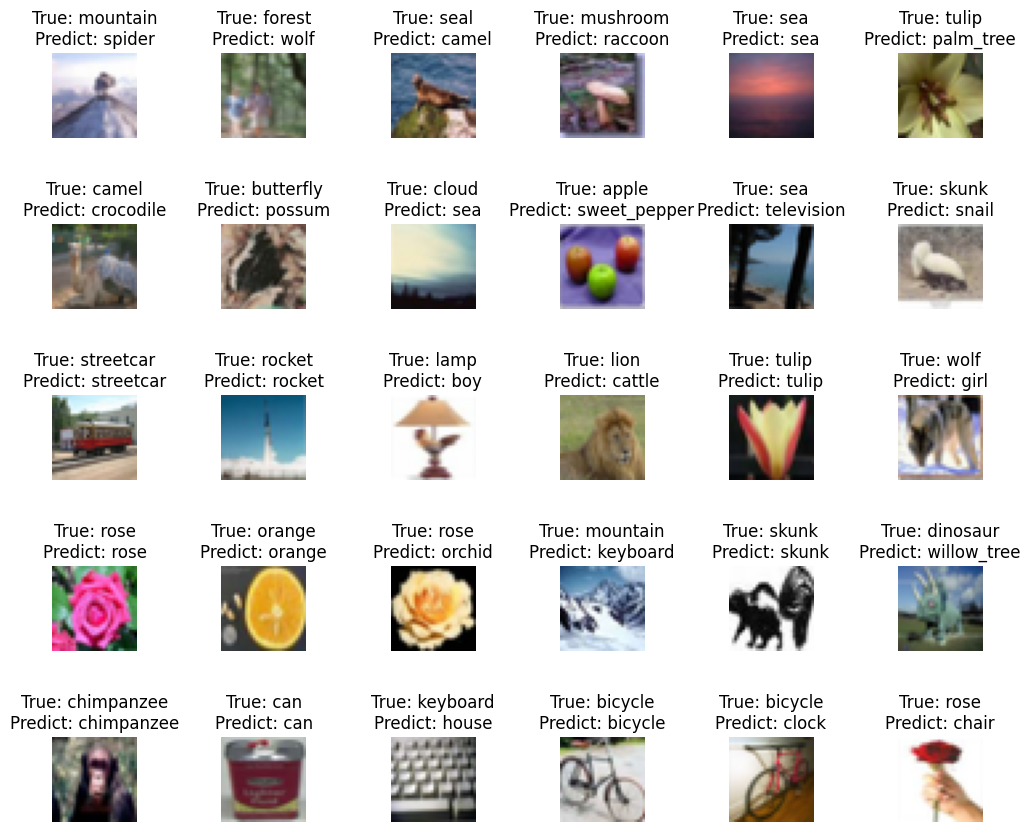

In [ ]:
import numpy as np

predictions = model.predict(x_test[:30])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test[:30].flatten()

fig, axes = plt.subplots(5, 6, figsize=(12, 10))
axes = axes.ravel()

for i in range(30):
    axes[i].imshow(x_test[i])
    axes[i].set_title(f"True: {labels[true_classes[i]]}\nPredict: {labels[predicted_classes[i]]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=1, hspace=1)
plt.show()

10. Visualize 30 random misclassified images.

313/313 [==============================] - 7s 24ms/step


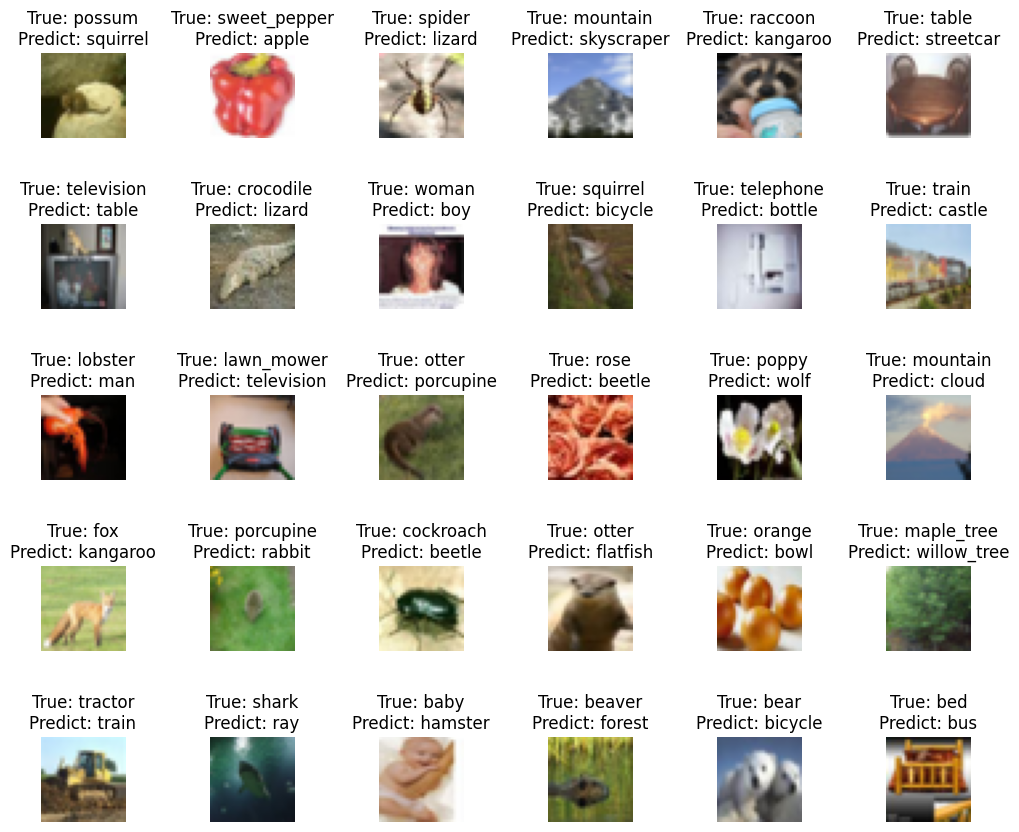

In [ ]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test.flatten()

misclassified_indices = np.where(predicted_classes != true_classes)[0]

num_misclassified_images = 30
random_misclassified_indices = np.random.choice(misclassified_indices, num_misclassified_images, replace=False)

fig, axes = plt.subplots(5, 6, figsize=(12, 10))
axes = axes.ravel()

for i, misclassified_index in enumerate(random_misclassified_indices):
    axes[i].imshow(x_test[misclassified_index])
    axes[i].set_title(f"True: {labels[true_classes[misclassified_index]]}\nPredict: {labels[predicted_classes[misclassified_index]]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=1, hspace=1)
plt.show()